#### Linear regression and its extensions continue to be a common and useful method of making predictions when the target vector is a quantitative value (e.g., home price, age).

# Fitting a Line
> Linear regression assumes that the relationship between the features and the target vector is approximately linear. That is, the effect (also called coefficient, weight, or parameter) of the features on the target vector is constant.
> > For the sake of explanation, we have trained our model using only three features.
> > > This means our linear model will be: 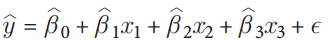

In [1]:
# If you want to train a model that represents a linear relationship between the feature and target vector.
# Use a linear regression (in scikit-learn, LinearRegression)
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                 n_features = 3,
                                 n_informative = 2,
                                 n_targets = 1,
                                 noise = 0.2,
                                 coef = False,
                                 random_state = 1)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features, target)


In [2]:
 # β0, also called the bias or intercept, can be viewed using intercept_
# View the intercept
model.intercept_

-0.009650118178816669

In [3]:
# β1 and β2 are shown using coef_:
# View the feature coefficients
model.coef_

array([1.95531234e-02, 4.42087450e+01, 5.81494563e+01])

In [4]:
# First value in the target vector
target[0]

-20.870747595269407

In [5]:
# Predict the target value of the first observation
model.predict(features)[0]

-20.861927709296808

In [7]:
# Using the score function, we can also see how well our model performed on the data:
# Print the score of the model on the training data
print(model.score(features, target))

0.9999901732607787


- The default score for linear regression in scikit learn is $R^2$, which ranges from 0.0
(worst) to 1.0 (best).

# Handling Interactive Effects
> Sometimes, a feature's impact on the target variable depends on another feature. For example, in a coffee scenario with sugar and stirring as binary features, just adding sugar or stirring alone won't make the coffee taste sweet. It is the interaction of adding sugar and stirring together that creates sweetness. This interaction effect between sugar and stirring impacts the taste of the coffee.
> > We can account for interaction effects by including a new feature comprising the product of corresponding values from the interacting features.
> > > 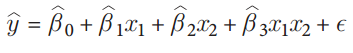

>> To create interaction terms using PolynomialFeatures, three important parameters must be set.
>> > 1) Setting interaction_only=True ensures only interaction terms are returned.
>> > 2) include_bias=False prevents adding a feature with 1s.
>> > 3) The degree parameter determines the maximum number of features to create interaction terms from. Checking the output ensures accuracy.

In [8]:
# If you have a feature whose effect on the target variable depends on another feature.
# Create an interaction term to capture that dependence using scikit-learn’s PolynomialFeatures:
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
 n_features = 2,
 n_informative = 2,
 n_targets = 1,
 noise = 0.2,
 coef = False,
 random_state = 1)
# Create interaction term
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_interaction, target)

# Fitting a Nonlinear Relationship
> Creating new features by raising an existing feature, x, to various powers (x^2, x^3, etc.) allows for modeling nonlinear relationships. More new features added means increased flexibility.
>> degree determines the maximum number of degrees for the polynomial features. For example, degree=3 will generate $x^2$
and $x^3$. Second, by default PolynomialFeatures includes a feature containing only 1s (called a bias). We can remove that by setting include_bias=False.

In [9]:
# If you want to model a nonlinear relationship.
# Create a polynomial regression by including polynomial features in a linear regression model:
# Load library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
 n_features = 3,
 n_informative = 2,
 n_targets = 1,
 noise = 0.2,
 coef = False,
 random_state = 1)

# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_polynomial, target)


In [11]:
features_polynomial.shape

(100, 19)

# Reducing Variance with Regularization
> In standard linear regression the model trains to minimize the sum of squared error
between the true (yi) and prediction ($\hat y_i$)) target values, or residual sum of squares
(RSS):
> > 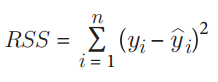

> `Regularized regression` learners minimize RSS with a penalty on coefficient size, known as a shrinkage penalty to "shrink" the model. Two common types are ridge regression and lasso, differing in shrinkage penalty type. Ridge:
> > 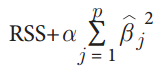

>The `lasso` is similar, except the shrinkage penalty is a tuning hyper‐parameter multiplied by the sum of the absolute value of all coefficients:
>> 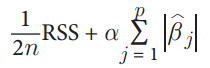

> Ridge regression generally has slightly better predictions than lasso, but lasso produces more interpretable models. Elastic net combines both penalties for a balanced approach.
> - Both methods penalize large or complex models.
> - The hyperparameter, α, lets us control how much we penalize the coefficients, with higher values of α creating simpler models.
> - The ideal value of α should be tuned like any other hyperparameter. In scikit-learn, α is set using the `alpha` parameter.

In [1]:
# if you want to reduce the variance of your linear regression model
# Use a learning algorithm that includes a shrinkage penalty (also called regularization) like ridge regression and lasso regression
# Load libraries
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
 n_features = 3,
 n_informative = 2,
 n_targets = 1,
 noise = 0.2,
 coef = False,
 random_state = 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create ridge regression with an alpha value
regression = Ridge(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

In [2]:
# scikit-learn includes a RidgeCV method that allows us to select the ideal value for α:
# Load library
from sklearn.linear_model import RidgeCV
# Create ridge regression with three alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
# Fit the linear regression
model_cv = regr_cv.fit(features_standardized, target)
# View coefficients
model_cv.coef_
# array([1.29223201e-02, 4.40972291e+01, 5.38979372e+01])

array([1.29223201e-02, 4.40972291e+01, 5.38979372e+01])

In [4]:
# We can then easily view the best model’s α value:
# View alpha
model_cv.alpha_

0.1

- Standardizing features before training in linear regression &amp; regularized models is a must to ensure accurate coefficient values.

# Reducing Features with Lasso Regression
> One interesting characteristic of lasso regression’s penalty is that it can shrink the coefficients of a model to zero, effectively reducing the number of features in the model.
> > **For example**, in our solution we set alpha to 0.5, and we can see that many of the coefficients are 0, meaning their corresponding features are not used in the model

In [5]:
# If you want to simplify your linear regression model by reducing the number of features.
# Use a lasso regression:
# Load library
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
 n_features = 3,
 n_informative = 2,
 n_targets = 1,
 noise = 0.2,
 coef = False,
 random_state = 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create lasso regression with alpha value
regression = Lasso(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

In [6]:
# View coefficients
model.coef_

array([-0.        , 43.58618393, 53.39523724])

In [7]:
# Create lasso regression with a high alpha
regression_a10 = Lasso(alpha=10)
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_

array([-0.        , 32.92181899, 42.73086731])

- Adjusting Lasso's hyperparameter allows us to include 100 features in the matrix but use only 10 important ones, hence reducing variance.

# END OF Chapter 13